## Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

## Attribute Information
* id: unique identifier
* gender: "Male", "Female" or "Other"
* age: age of the patient
* hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* ever_married: "No" or "Yes"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* Residence_type: "Rural" or "Urban"
* avg_glucose_level: average glucose level in blood
* bmi: body mass index
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
* stroke: 1 if the patient had a stroke or 0 if not
* Note: "Unknown" in smoking_status means that the information is unavailable for this patient

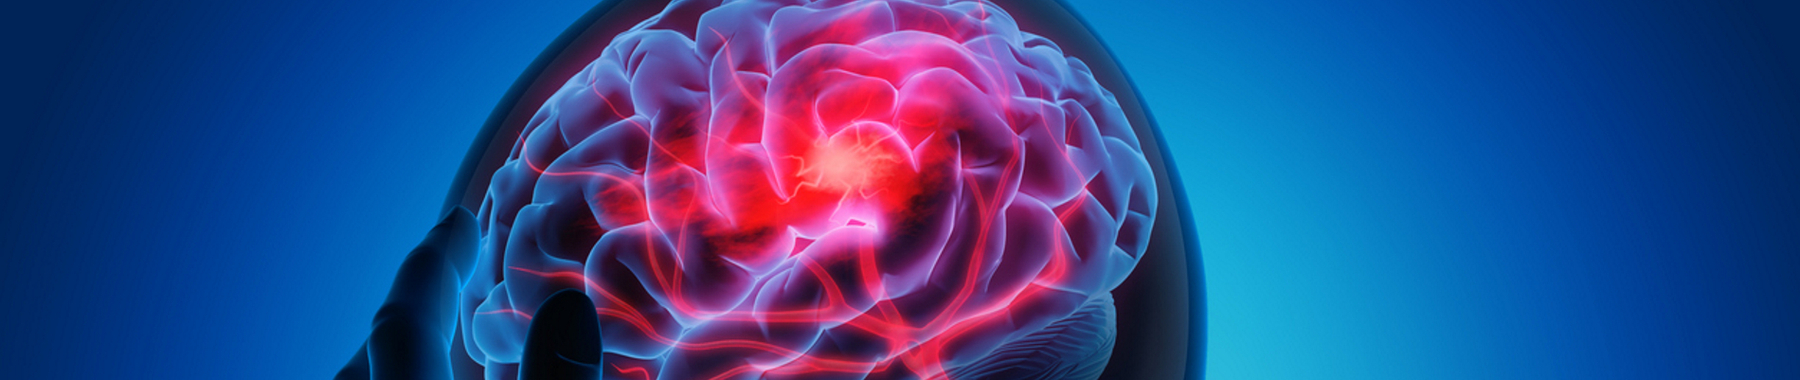

## Import Libraries 

In [2]:
import pandas as pd
import matplotlib.pylab as plt 
import seaborn as sns
import numpy as np 

## Load Data

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.shape

(5110, 12)

In [6]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
data.dropna(inplace=True)

In [8]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
data.duplicated().value_counts()

False    4909
dtype: int64

In [11]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,37064.313506,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,20995.098457,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,77.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,18605.000000,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,37608.000000,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,55220.000000,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4909 non-null   int64  
 1   gender             4909 non-null   object 
 2   age                4909 non-null   float64
 3   hypertension       4909 non-null   int64  
 4   heart_disease      4909 non-null   int64  
 5   ever_married       4909 non-null   object 
 6   work_type          4909 non-null   object 
 7   Residence_type     4909 non-null   object 
 8   avg_glucose_level  4909 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     4909 non-null   object 
 11  stroke             4909 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 498.6+ KB


In [13]:
data.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4709,41930,Male,15.0,0,0,No,Private,Rural,144.15,24.1,never smoked,0


In [14]:
data.work_type.value_counts()

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

In [15]:
data.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [16]:
round(data.corr() , 1 )

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0
age,0.0,1.0,0.3,0.3,0.2,0.3,0.2
hypertension,0.0,0.3,1.0,0.1,0.2,0.2,0.1
heart_disease,0.0,0.3,0.1,1.0,0.2,0.0,0.1
avg_glucose_level,0.0,0.2,0.2,0.2,1.0,0.2,0.1
bmi,0.0,0.3,0.2,0.0,0.2,1.0,0.0
stroke,0.0,0.2,0.1,0.1,0.1,0.0,1.0


In [17]:
data.sample()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4928,65469,Male,11.0,0,0,No,children,Rural,121.71,23.4,never smoked,0


In [18]:
data.gender.value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

In [19]:
data.hypertension.value_counts()

0    4458
1     451
Name: hypertension, dtype: int64

There are 498 people having a hypertension and 4612 dosn't have hypertension

In [20]:
data.heart_disease.value_counts()

0    4666
1     243
Name: heart_disease, dtype: int64

In [21]:
data.ever_married.value_counts()

Yes    3204
No     1705
Name: ever_married, dtype: int64

In [22]:
data['ever_married'] = data['ever_married'].replace({'Yes' : 1 , 'No' : 0 })

In [23]:
data['gender'] = data['gender'].replace({'Male' : 1 , 'Female' : 0 })

In [24]:
data['Residence_type'] = data['Residence_type'].replace({'Urban' : 1 , 'Rural' : 0 })

In [25]:
data.drop('id' , axis=1 , inplace=True)

In [26]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3333,0,38.0,0,0,1,Private,0,80.82,49.3,never smoked,0


In [27]:
def count_plot(col):
    plt.figure(figsize=(10 ,6))
    sns.countplot(data = data , x = data[col])
    plt.show()

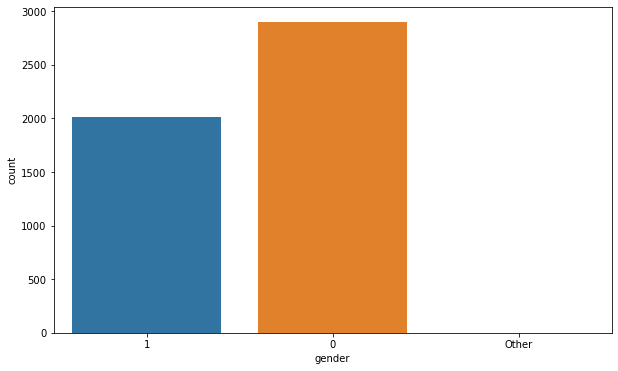

In [28]:
count_plot('gender')

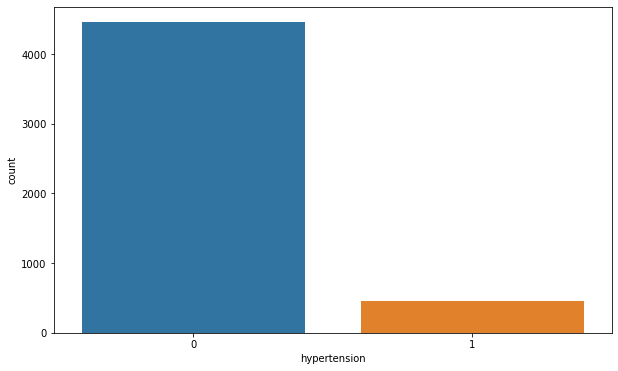

In [29]:
count_plot('hypertension')

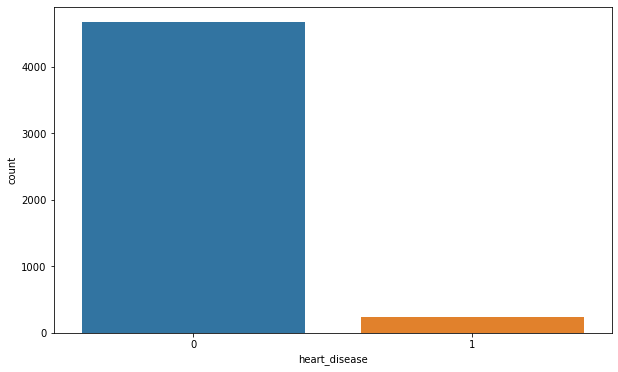

In [30]:
count_plot('heart_disease')

In [31]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
2558,0,28.0,0,0,1,Private,0,94.15,23.1,smokes,0


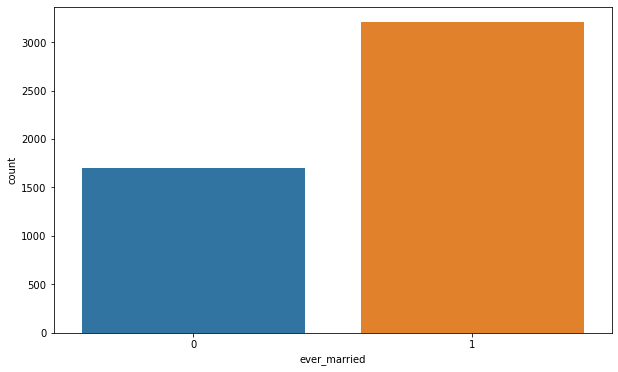

In [32]:
count_plot('ever_married')

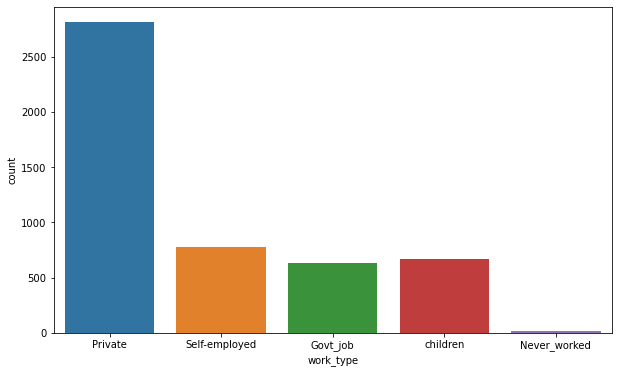

In [33]:
count_plot('work_type')

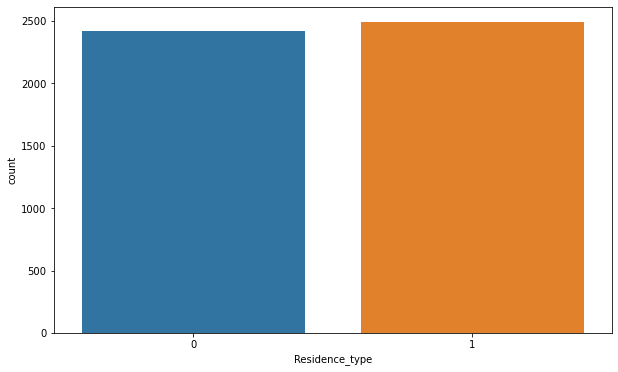

In [34]:
count_plot('Residence_type')

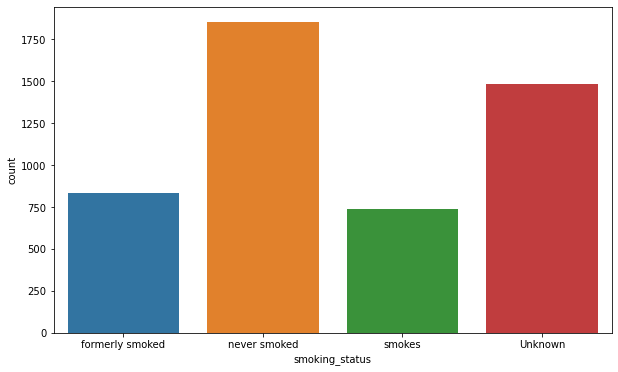

In [35]:
count_plot('smoking_status')

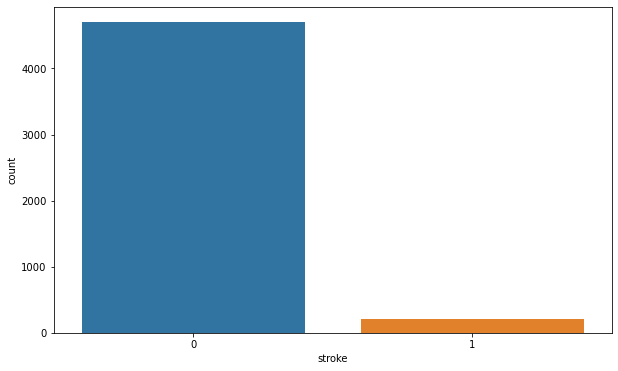

In [36]:
count_plot('stroke')

In [37]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3277,1,32.0,0,0,1,Private,0,71.5,31.8,never smoked,0


<AxesSubplot:xlabel='age', ylabel='avg_glucose_level'>

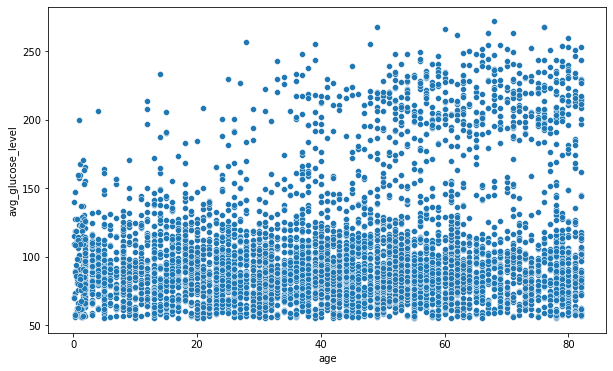

In [38]:
plt.figure(figsize=(10 ,6))
sns.scatterplot(data = data , x = 'age' , y ='avg_glucose_level')

In [39]:
## No RelationShip between avg_glucose_level and age

<AxesSubplot:xlabel='age', ylabel='bmi'>

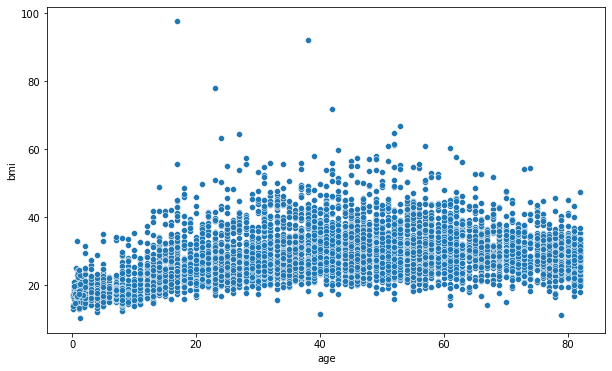

In [40]:
plt.figure(figsize=(10 ,6))
sns.scatterplot(data = data , x = 'age' , y ='bmi')

In [41]:
## No RelationShip between bmi and age

<AxesSubplot:>

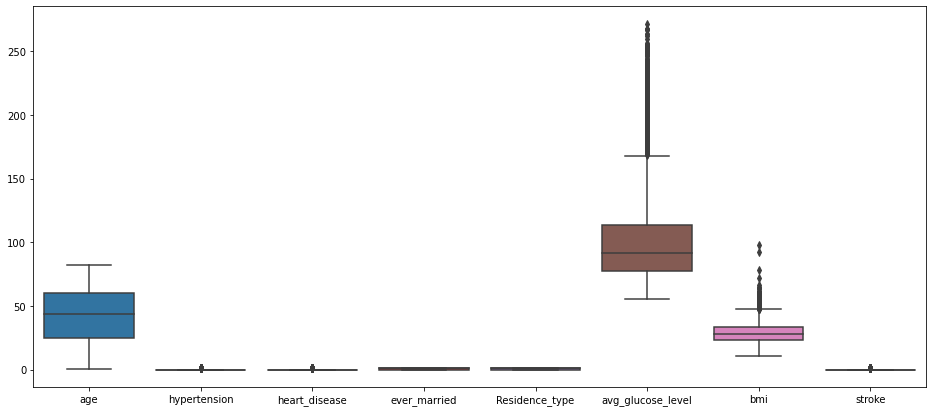

In [42]:
plt.figure(figsize=(16,7))
sns.boxplot(data = data )

<AxesSubplot:xlabel='age', ylabel='Count'>

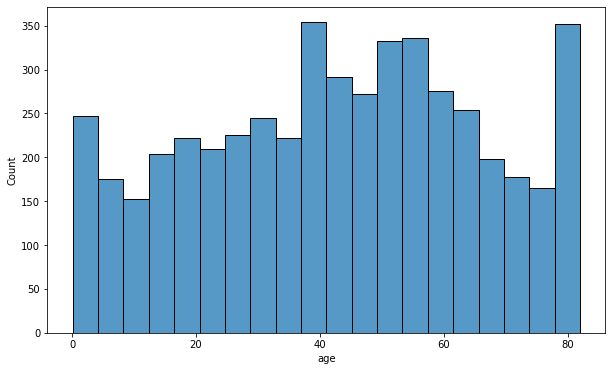

In [43]:
plt.figure(figsize=(10 ,6))
sns.histplot(data = data , x = data['age'])

In [44]:
data.bmi.max()

97.6

In [45]:
data.bmi.median()

28.1

In [46]:
def histplot(col):
    plt.figure(figsize=(12,6))
    sns.histplot(data = data , x = data[col])
    plt.show()

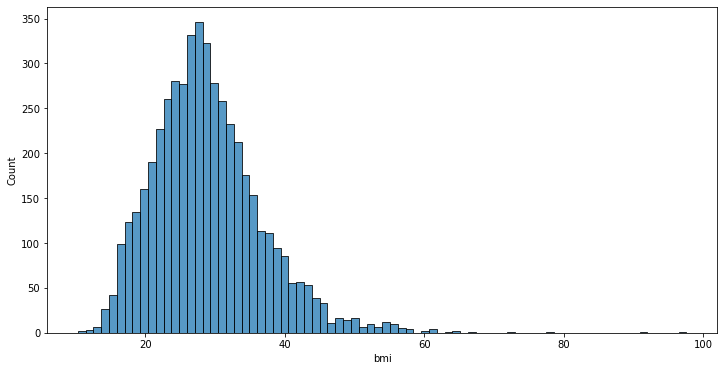

In [47]:
histplot('bmi')

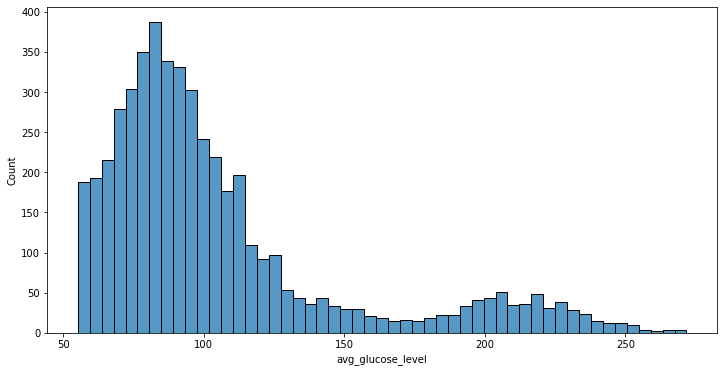

In [48]:
histplot('avg_glucose_level')

In [49]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3911,0,47.0,0,0,1,Private,1,67.08,22.3,Unknown,0


In [50]:
def work_type(col):
    if col == 'Private':
        return 0
    elif col == 'Self-employed':
        return 1
    elif col == 'Govt_job':
        return 2
    elif col == 'children':
        return 3
    else:
        return 4
data.work_type = data.work_type.apply(work_type)

In [51]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
594,0,63.0,1,0,1,0,1,105.95,23.5,smokes,0


In [52]:
def smoking_status(col):
    if col == 'formerly smoked':
        return 0
    elif col == 'never smoked':
        return 1
    elif col == 'smokes':
        return 2
    else:
        return 3

In [53]:
data.smoking_status = data.smoking_status.apply(smoking_status)

In [54]:
data.sample()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1364,0,13.0,0,0,0,3,0,102.27,17.2,1,0


In [72]:
data.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int64
work_type              int64
Residence_type         int64
avg_glucose_level    float64
bmi                  float64
smoking_status         int64
stroke                 int64
dtype: object

In [82]:
X = data.drop('stroke' , axis = 1 )
y = data['stroke']

## Required Libraries

In [116]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


In [102]:
#One-Hot-Encoding for the Nominal Columns

X = pd.get_dummies(X,columns=['gender','work_type','smoking_status','ever_married','Residence_type'])
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_0,gender_1,gender_Other,work_type_0,work_type_1,...,work_type_3,work_type_4,smoking_status_0,smoking_status_1,smoking_status_2,smoking_status_3,ever_married_0,ever_married_1,Residence_type_0,Residence_type_1
0,67,0,1,228.69,36.6,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
2,80,0,1,105.92,32.5,0,1,0,1,0,...,0,0,0,1,0,0,0,1,1,0
3,49,0,0,171.23,34.4,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,1
4,79,1,0,174.12,24.0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
5,81,0,0,186.21,29.0,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13,0,0,103.08,18.6,1,0,0,0,0,...,1,0,0,0,0,1,1,0,1,0
5106,81,0,0,125.20,40.0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,1
5107,35,0,0,82.99,30.6,1,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
5108,51,0,0,166.29,25.6,0,1,0,1,0,...,0,0,1,0,0,0,0,1,1,0


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [104]:
X_test.shape

(982, 21)

In [105]:
X_train.shape

(3927, 21)

In [106]:
y_test.shape

(982,)

In [107]:
y_train.shape

(3927,)

In [108]:
from imblearn.over_sampling import SMOTE

In [109]:
pd.DataFrame(y_train).value_counts()

stroke
0         3769
1          158
dtype: int64

In [110]:
pd.DataFrame(y_test).value_counts()

stroke
0         931
1          51
dtype: int64

In [111]:
smote = SMOTE()

In [112]:
x_resample, y_resample = smote.fit_resample(X_train , y_train.ravel())

In [114]:
pd.DataFrame(y_resample).value_counts()

0    3769
1    3769
dtype: int64

In [132]:
def models(x, y):
    accuracy = []
    f1score = []
    model = []
    
    model.append(LogisticRegression())
    model.append(KNeighborsClassifier())
    model.append(RandomForestClassifier())
    model.append(XGBClassifier())
    model.append(SVC())
    model.append(BaggingClassifier())
    model.append(GradientBoostingClassifier())
    model.append(AdaBoostClassifier(RandomForestClassifier()))
    
    for i in model:
        mdl = i
        i.fit(x, y)
        pred = i.predict(X_test)
        
        accuracy.append((round(accuracy_score(y_test, pred), 1))*100)
        f1score.append((round(f1_score(y_test, pred), 1))*100)
        
        print(f'Model: {i}\nAccuracy: {accuracy_score(y_test, pred)}\nF1-score: {f1_score(y_test, pred)}\n\n')

In [133]:
models(x_resample,y_resample)

C:\Users\96654\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: LogisticRegression()
Accuracy: 0.9348268839103869
F1-score: 0.1794871794871795


Model: KNeighborsClassifier()
Accuracy: 0.7892057026476579
F1-score: 0.18823529411764706


Model: RandomForestClassifier()
Accuracy: 0.9470468431771895
F1-score: 0.0




C:\Users\96654\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
Accuracy: 0.9419551934826884
F1-score: 0.06557377049180327


Model: SVC()
Accuracy: 0.7321792260692465
F1-score: 0.254957507082153


Model: BaggingClassifier()
Accuracy: 0.9378818737270875
F1-score: 0.0


Model: GradientBoostingClassifier()
Accuracy: 0.9429735234215886
F1-score: 0.125


Model: AdaBoostClassifier(base_estimator=RandomForestClassifier())


In [140]:
# Logistic Regression have a comparatively high f1-score than others.

In [139]:
lr = LogisticRegression()
lr.fit(x_resample, y_resample)
pred = lr.predict(X_test)

f1 = f1_score(y_test, pred)
print(f' f1_score is {round(f1, 1)} with Logistic Regression')

 f1_score is 0.2 with Logistic Regression


C:\Users\96654\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
